In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

HERE = Path.cwd()
PROJECT_ROOT = HERE.parent if HERE.name == "Notebooks" else HERE

PREP_DIR = PROJECT_ROOT / "data" / "processed"
OUT_DIR  = PROJECT_ROOT / "results" / "eda"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("PREP_DIR:", PREP_DIR)
print("OUT_DIR:", OUT_DIR)


PREP_DIR: d:\INS\Assignment_2\data\processed
OUT_DIR: d:\INS\Assignment_2\results\eda


In [5]:
parq_path = PREP_DIR / "unified_events.parquet"
csv_path  = PREP_DIR / "unified_events.csv"

if parq_path.exists():
    df = pd.read_parquet(parq_path)   # pandas.read_parquet :contentReference[oaicite:4]{index=4}
    print("Loaded parquet:", parq_path)
elif csv_path.exists():
    df = pd.read_csv(csv_path)
    print("Loaded csv:", csv_path)
else:
    raise FileNotFoundError("Neither unified_events.parquet nor unified_events.csv exists. Re-run the Phase 1 save cell.")

print(df.shape)
df.head()


Loaded parquet: d:\INS\Assignment_2\data\processed\unified_events.parquet
(100000, 47)


,event_id,timestamp,event_type,source,severity,raw_log,user,action,object,process_id,...,meta_session_id,meta_risk_score,meta_confidence,log_source,host,ts_round,merge_key,attack_stage,label,time_delta_sec
0,e88436d5-521a-4d33-a4f2-38e06c616374,2027-03-19 22:19:02+00:00,firewall,Snort v2.9.20,info,CEF:0|Snort v2.9.20|SIEM|1.0|100|firewall|info...,bsmith,allow,character,5037.0,...,00011490-bb1c-41fd-810e-525ab5181feb,17.64,0.82,FIREWALL,unknown,2027-03-19 22:19:02+00:00,2027-03-19 22:19:02+00:00|unknown|156.223.41.8...,lateral_movement,4,0.0
1,c9185e6d-8916-4051-aec8-f55cb235e516,2025-05-31 03:40:36+00:00,endpoint,Vectra AI v5.0.0,low,CEF:0|Vectra AI v5.0.0|SIEM|1.0|100|endpoint|l...,parrishricardo,file_access,federal,2074.0,...,00014876-4207-44ea-8829-da830ab06847,54.48,0.93,SYSTEM,unknown,2025-05-31 03:40:36+00:00,2025-05-31 03:40:36+00:00|unknown|0.0.0.0|0.0.0.0,benign,0,0.0
2,9b2b15bf-9f35-4bdf-9b45-ff4cb8f8a73e,2025-02-25 04:51:49+00:00,iot,Elastic SIEM v8.9.0,info,CEF:0|Elastic SIEM v8.9.0|SIEM|1.0|100|iot|inf...,bsmith,unusual_activity,character,5037.0,...,00048c17-86a3-48d6-b49a-4fdf4cab780b,58.14,0.20,SYSTEM,unknown,2025-02-25 04:51:49+00:00,2025-02-25 04:51:49+00:00|unknown|0.0.0.0|0.0.0.0,benign,0,0.0
3,1040004a-61c2-4416-8cea-f365668701d1,2025-05-04 01:58:27+00:00,ai,FireEye HX v4.5.0,high,CEF:0|FireEye HX v4.5.0|SIEM|1.0|100|ai|high| ...,zmcdaniel,model_access,character,5037.0,...,0004cf0e-178b-4a47-9e3b-dadf3b02e4db,16.94,0.82,SYSTEM,unknown,2025-05-04 01:58:27+00:00,2025-05-04 01:58:27+00:00|unknown|0.0.0.0|0.0.0.0,benign,0,0.0
4,9ce427d8-e4ba-4521-92b2-5c83b041ebf4,2025-01-18 23:57:18+00:00,ai,CrowdStrike v6.45.0,low,CEF:0|CrowdStrike v6.45.0|SIEM|1.0|100|ai|low|...,castrokaren,training_data_poisoning,character,5037.0,...,000542c2-c613-4782-b686-2578f25f9506,59.46,0.52,SYSTEM,unknown,2025-01-18 23:57:18+00:00,2025-01-18 23:57:18+00:00|unknown|0.0.0.0|0.0.0.0,benign,0,0.0


In [6]:
print("Time range:", df["timestamp"].min(), "->", df["timestamp"].max())
print("\nMissing % (top 15):")
print((df.isna().mean() * 100).sort_values(ascending=False).head(15))

print("\nAttack-stage counts:")
print(df["attack_stage"].value_counts(dropna=False))  # :contentReference[oaicite:3]{index=3}

print("\nLog-source counts:")
print(df["log_source"].value_counts(dropna=False))    # :contentReference[oaicite:4]{index=4}


Time range: 2020-07-12 21:38:20+00:00 -> 2030-07-10 06:49:21+00:00

Missing % (top 15):
alert_type         87.5
category           87.5
signature_id       87.5
source              0.0
event_id            0.0
timestamp           0.0
event_type          0.0
action              0.0
object              0.0
process_id          0.0
parent_process      0.0
additional_info     0.0
severity            0.0
raw_log             0.0
user                0.0
dtype: float64

Attack-stage counts:
attack_stage
benign                  89183
lateral_movement         2502
recon                    2370
exploit                  2294
exfiltration             2276
privilege_escalation     1375
Name: count, dtype: int64

Log-source counts:
log_source
SYSTEM      62717
FIREWALL    24783
IDS         12500
Name: count, dtype: int64


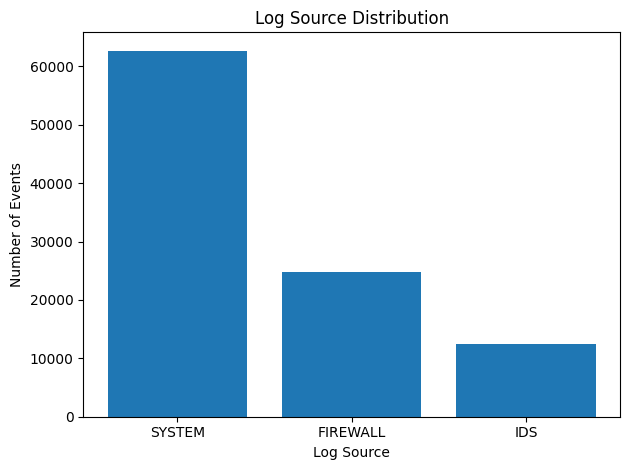

In [ ]:
# 1. Log Source Distribution
# Plot number of events from each log source (firewall, IDS, system logs).


counts = df["log_source"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)  # :contentReference[oaicite:7]{index=7}
plt.title("Log Source Distribution")
plt.xlabel("Log Source")
plt.ylabel("Number of Events")
plt.tight_layout()

# Save before show (matplotlib warns about order) :contentReference[oaicite:8]{index=8}
plt.savefig(OUT_DIR / "eda_1_log_source_distribution.png", dpi=200)  # :contentReference[oaicite:9]{index=9}
plt.show()


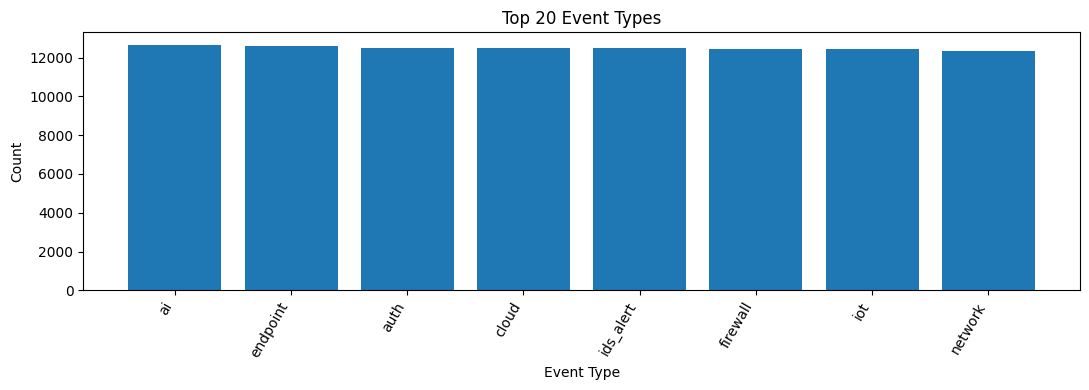

In [8]:
# 2. Event Type Frequency
# Histogram or bar chart of top 20 event types.

top20 = df["event_type"].value_counts().head(20)  # :contentReference[oaicite:11]{index=11}

plt.figure(figsize=(11,4))
plt.bar(top20.index.astype(str), top20.values)    # :contentReference[oaicite:12]{index=12}
plt.title("Top 20 Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.savefig(OUT_DIR / "eda_2_top20_event_types.png", dpi=200)  # :contentReference[oaicite:13]{index=13}
plt.show()


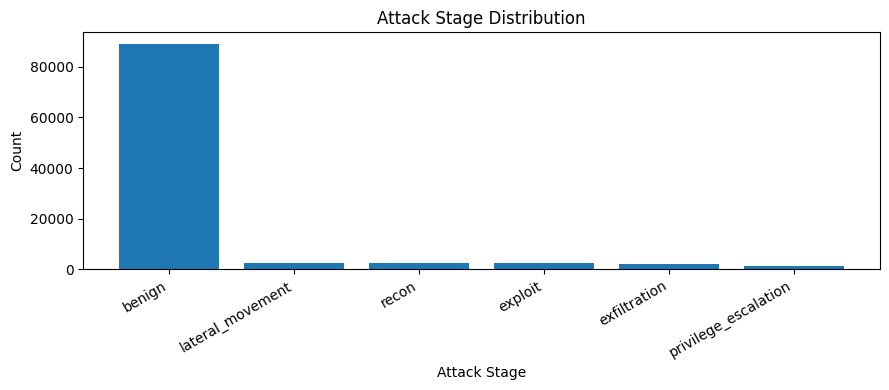

In [9]:
# Attack Stage Distribution
# Bar chart of counts for each attack stage label.


stage_counts = df["attack_stage"].value_counts()

plt.figure(figsize=(9,4))
plt.bar(stage_counts.index.astype(str), stage_counts.values)  # :contentReference[oaicite:15]{index=15}
plt.title("Attack Stage Distribution")
plt.xlabel("Attack Stage")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig(OUT_DIR / "eda_3_attack_stage_distribution.png", dpi=200)  # :contentReference[oaicite:16]{index=16}
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_13968\1660458555.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = tmp.set_index("timestamp").resample("1H").size()  # :contentReference[oaicite:20]{index=20}


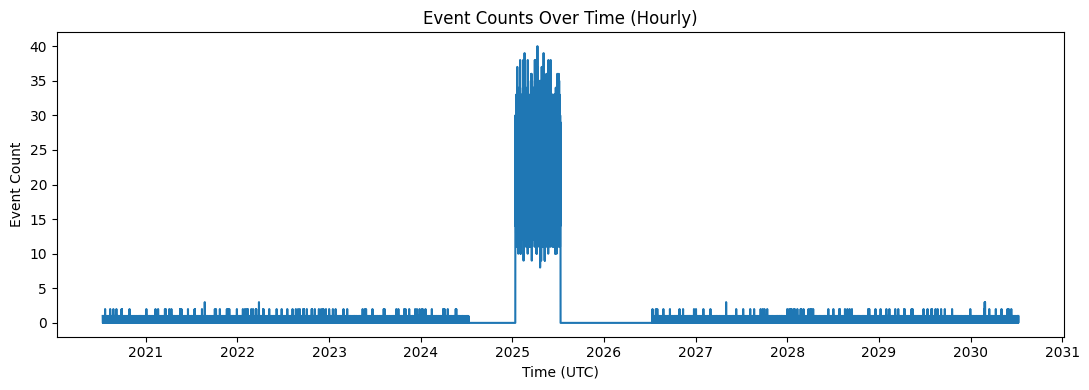

In [10]:
# Temporal Patterns
# Plot event counts over time to reveal:
# • bursts of reconnaissance
# • exploitation attempts
# • privilege escalation sequences


tmp = df.dropna(subset=["timestamp"]).sort_values("timestamp").copy()

hourly = tmp.set_index("timestamp").resample("1H").size()  # :contentReference[oaicite:20]{index=20}

plt.figure(figsize=(11,4))
plt.plot(hourly.index, hourly.values)  # :contentReference[oaicite:21]{index=21}
plt.title("Event Counts Over Time (Hourly)")
plt.xlabel("Time (UTC)")
plt.ylabel("Event Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "eda_4_temporal_hourly.png", dpi=200)  # :contentReference[oaicite:22]{index=22}
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_13968\420518386.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("1H")
C:\Users\Carol\AppData\Local\Temp\ipykernel_13968\420518386.py:7: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .size()


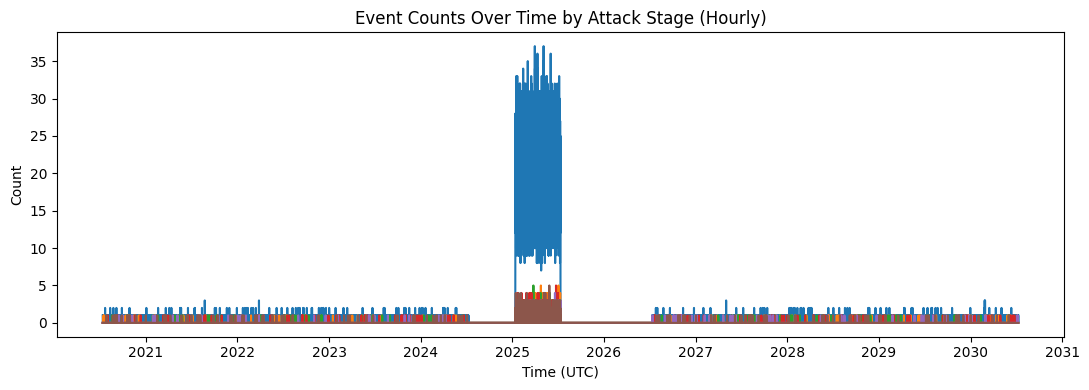

In [11]:
# by attack stage

by_stage = (
    tmp.set_index("timestamp")
       .groupby("attack_stage")
       .resample("1H")
       .size()
       .unstack(0)
       .fillna(0)
)

plt.figure(figsize=(11,4))
plt.plot(by_stage.index, by_stage.values)  # :contentReference[oaicite:23]{index=23}
plt.title("Event Counts Over Time by Attack Stage (Hourly)")
plt.xlabel("Time (UTC)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "eda_4_temporal_by_stage_hourly.png", dpi=200)  # :contentReference[oaicite:24]{index=24}
plt.show()


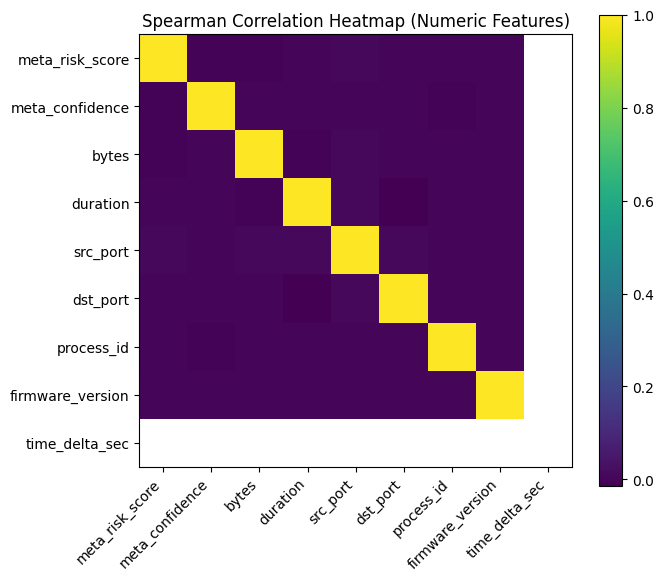

In [12]:
# Feature Correlation
# Compute Pearson/Spearman correlations for numerical fields and show a heatmap.

numeric_candidates = [
    "meta_risk_score", "meta_confidence",
    "bytes", "duration", "src_port", "dst_port",
    "process_id", "firmware_version", "time_delta_sec"
]
num_cols = [c for c in numeric_candidates if c in df.columns]

corr = df[num_cols].corr(method="spearman")  # :contentReference[oaicite:28]{index=28}

plt.figure(figsize=(7,6))
plt.imshow(corr.values)  # :contentReference[oaicite:29]{index=29}
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Spearman Correlation Heatmap (Numeric Features)")
plt.colorbar()
plt.tight_layout()
plt.savefig(OUT_DIR / "eda_5_spearman_correlation_heatmap.png", dpi=200)  # :contentReference[oaicite:30]{index=30}
plt.show()


In [13]:
# Save EDA tables (For the final report)

# log_source x attack_stage table
ct = pd.crosstab(df["log_source"], df["attack_stage"])  # :contentReference[oaicite:32]{index=32}
ct.to_csv(OUT_DIR / "table_log_source_by_attack_stage.csv")

# top 5 event types per stage
top_per_stage = (
    df.groupby("attack_stage")["event_type"]
      .value_counts()
      .groupby(level=0)
      .head(5)
      .rename("count")
      .reset_index()
)
top_per_stage.to_csv(OUT_DIR / "table_top5_event_types_per_stage.csv", index=False)

display(ct)
display(top_per_stage.head(30))


attack_stage,benign,exfiltration,exploit,lateral_movement,privilege_escalation,recon
log_source,,,,,,
FIREWALL,20758,1538,0,2487,0,0
IDS,7098,738,2294,0,0,2370
SYSTEM,61327,0,0,15,1375,0


,attack_stage,event_type,count
0,benign,ai,12658
1,benign,endpoint,12584
2,benign,auth,12509
3,benign,iot,12434
4,benign,cloud,11142
5,exfiltration,network,1538
6,exfiltration,ids_alert,738
7,exploit,ids_alert,2294
8,lateral_movement,firewall,2487
9,lateral_movement,ai,6
